,X...Location.of.harvest,Date.of.harvest,Sex,Age.class,Body.mass.in.kg,Amount.of.cropland.in.hectares,Post.harvest.abundance.estimates
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>
1,desoto,2003 10 18,Male,0.5,25.4,681,1214
2,desoto,2003 10 18,Male,0.5,24.9,681,1214
3,desoto,2003 10 18,Female,0.5,25.4,681,1214
4,desoto,2003 10 18,Female,0.5,32.2,681,1214
5,desoto,2003 10 18,Male,0.5,21.3,681,1214
6,desoto,2003 10 18,Male,0.5,25.4,681,1214


,X...Location.of.harvest,Date.of.harvest,Sex,Age.class,Body.mass.in.kg,Amount.of.cropland.in.hectares,Post.harvest.abundance.estimates
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>
1791,desoto,2010 01 03,Female,1.5,41.3,437,1071
1792,desoto,2010 01 03,Female,1.5,40.8,437,1071
1793,desoto,2010 01 03,Female,3.5,53.5,437,1071
1794,desoto,2010 01 03,Female,3.5,54.4,437,1071
1795,desoto,2010 01 03,Female,3.5,55.8,437,1071
1796,desoto,2010 01 03,Female,4.5-5.5,57.2,437,1071


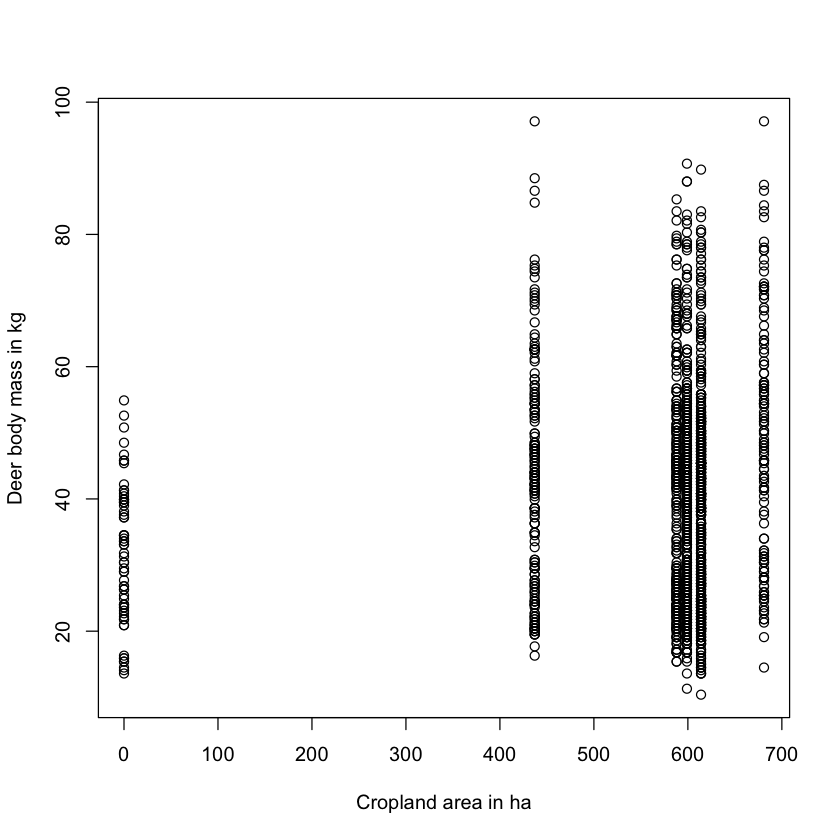

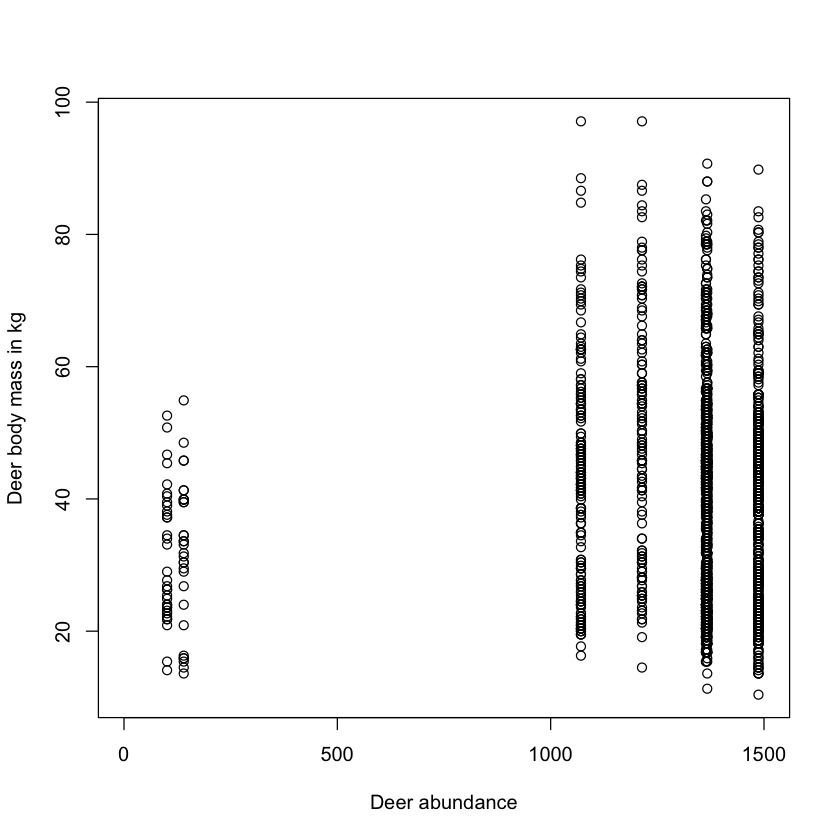

In [8]:
# Load the data from dropbox link
# Note: If you use dropbox link for your own data make sure to change dl=0 to dl=1 at end of sharable link
url <- "https://www.dropbox.com/s/9h6hqc7ikyj9kmg/Deer%20Body%20Mass%20Data.csv?dl=1"
df.deer <- read.csv(url)

# Check out first six rows of data set
head(df.deer)

# Check out last six rows of data set
tail(df.deer)

# Plot showing the marginal effect of cropland on body mass
plot(df.deer$Amount.of.cropland.in.hectares,
     df.deer$Body.mass.in.kg,
     xlab="Cropland area in ha",
     ylab="Deer body mass in kg")

# Plot showing the marginal effect of deer abundance on body mass
plot(df.deer$Post.harvest.abundance.estimates,
     df.deer$Body.mass.in.kg,     
     xlab="Deer abundance",
     ylab="Deer body mass in kg",xlim=c(0,1500))


In [6]:

# Split data into two data sets. The Boyer Chute NWR data will be used for 
# extreme model testing at some point. 
df.boyer <- df.deer[which(df.deer$Location.of.harvest=="boyer"),]
df.desoto <- df.deer[which(df.deer$Location.of.harvest=="desoto"),]

# Determine how many observations are in each data set
dim(df.boyer)
dim(df.desoto)

# Split data from DeSoto NWR into two data sets. One data set will be used
# for model fitting (estimating model parameters) and the other will be used
# for model testing
set.seed(3028)
keep <- sample(1:1730,size=865,replace=FALSE)
df.desoto.mod <- df.desoto[keep,]
df.desoto.test <- df.desoto[-keep,]

# Estimate parameters for the linear model that we wrote out on the whiteboard in class on June 14
m1 <- lm(Body.mass.in.kg~Amount.of.cropland.in.hectares+Post.harvest.abundance.estimates,data=df.desoto.mod)
m1

# Use estimated slope parameter to determine how many lbs a deer
# would gain if we added a 100 ha crop field
(0.02522*100)*2.2

# Use estimated slope parameter to determine how many lbs a deer
# would gain if we harvested (removed) 100 deer from each refuge
(-0.02180*(-100))*2.2


[1] 0 7

[1] 0 7

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): 0 (non-NA) cases


In [7]:
# Use estimated slope parameters to determine how many
# deer would need to be removed (or added) from the wildlife refuge
# to offset the weight loss (or gain)
# from a field of x ha being removed from production
x <- 100 # Area of ag field in ha
(-0.02522*x/0.02180)
# NOTE: formula is derived quantity.
# 115.5 deer would need to be removed from the refuge to offset the weight loss
# from a 100 ha field being removed from production
# The client would probably like to have a lower and upper bound, and would
# likely choose the lower bound.


# Estimate parameters for the linear model using the maximum likelihood estimation
library(nlme)
m2 <- gls(
  Body.mass.in.kg ~ Amount.of.cropland.in.hectares + Post.harvest.abundance.estimates,
	data=df.desoto.mod,
	method="ML"
)
m2

[1] -115.6881

ERROR: Error in na.fail.default(structure(list(Body.mass.in.kg = c(NA_real_, : missing values in object


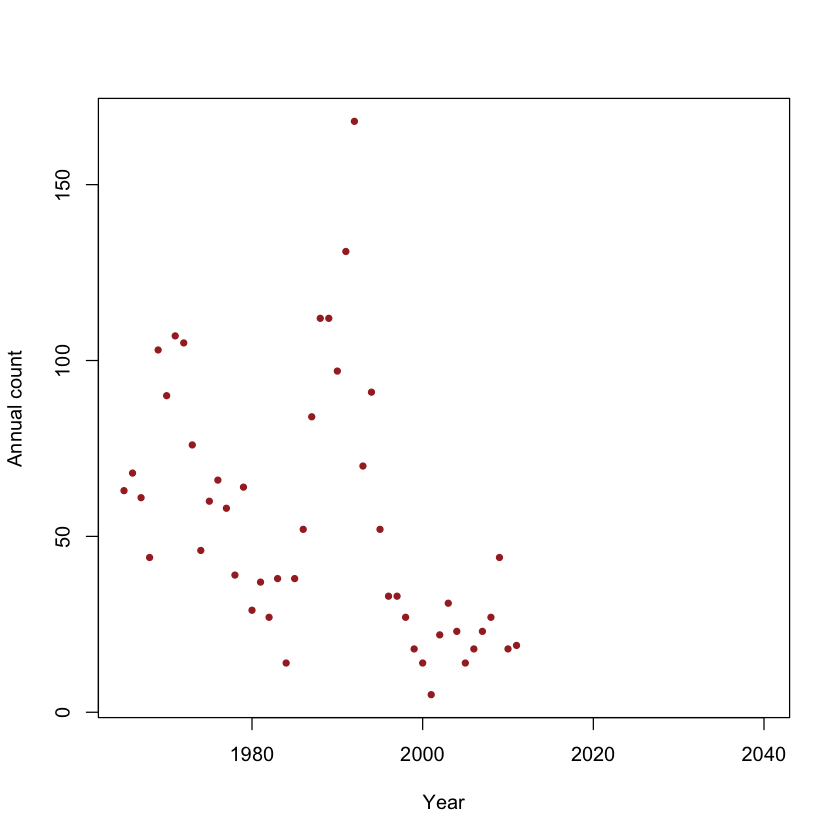

In [ ]:
y <- c(63, 68, 61, 44, 103, 90, 107, 105, 76, 46, 60, 66, 58, 39, 64, 29, 37,
27, 38, 14, 38, 52, 84, 112, 112, 97, 131, 168, 70, 91, 52, 33, 33, 27,
18, 14, 5, 22, 31, 23, 14, 18, 23, 27, 44, 18, 19)
year <- 1965:2011
df <- data.frame(y = y, year = year)
plot(x = df$year, y = df$y, xlab = "Year", ylab = "Annual count", main = "",
col = "brown", pch = 20, xlim = c(1965, 2040))

# Model
$y_i = \beta_0 + \beta_1x_i + \epsilon_i$